#                                      **EE521 mini project**

# Title: Implementation of various digital filter for image processing

Name:Dheeraj Kumar Bharti

> Roll no. 204102303




In [9]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
import cv2 as cv 
from matplotlib import cm
import numpy
import math
from skimage.color import rgb2gray
from scipy import signal
from skimage.util import random_noise
from scipy import fftpack
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from skimage.util import random_noise
from skimage import data
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.util import random_noise
import cv2


# **Spatial Domain Filter**

1.**Median Filter**

In [2]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

Text(0.5, 1.0, 'median filter output of image')

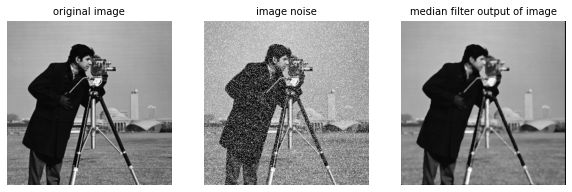

In [15]:
image = data.camera()  
type(image)
plt.figure(figsize=(10,10))
plt.gray() # show the filtered result in grayscale
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("original image",size=10)
plt.axis('off')
numpy.ndarray #Image is a NumPy array: 

gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(image,gauss)
im_out=median_filter(img_gauss,7)
plt.subplot(1,3,2)
plt.imshow(img_gauss)
plt.title("image noise",size=10)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(im_out)
plt.axis('off')
plt.title("median filter output of image",size=10)


**2.mean Filter**

In [16]:
def meanFilter(im):
    img = im
    w = 2

    for i in range(2,im.shape[0]-2):
        for j in range(2,im.shape[1]-2):
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = numpy.mean(block,dtype=numpy.float32)
            img[i][j] = int(m)
    return img

Text(0.5, 1.0, 'mean filter output ')

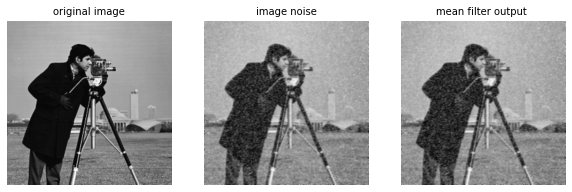

In [17]:
image = data.camera()  
type(image)
plt.figure(figsize=(10,10))
plt.gray() # show the filtered result in grayscale
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("original image",size=10)
plt.axis('off')
numpy.ndarray #Image is a NumPy array: 

gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(image,gauss)
im_out=meanFilter(img_gauss)
plt.subplot(1,3,2)
plt.imshow(img_gauss)
plt.title("image noise",size=10)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(im_out)
plt.axis('off')
plt.title("mean filter output ",size=10)


# **Frequency Domain Filter**

(530, 800) (1060, 1600)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'Output Image')

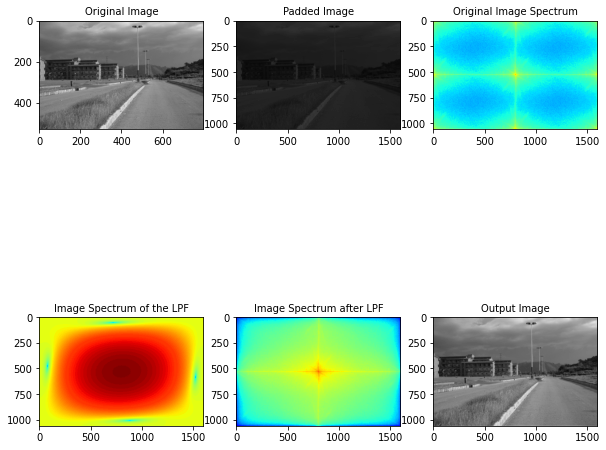

In [10]:
im =cv.imread('/content/IITG.jpg',0)
im1 = np.zeros((2*im.shape[0], 2*im.shape[1]))
print(im.shape, im1.shape)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im1[2*i,2*j] = im[i,j]
 
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector
#First double the size of the by padding zero rows/columns at every alternate positions.
# the LPF kernel
kernel = [[0.25, 0.5, 0.25], [0.5, 1, 0.5], [0.25, 0.5, 0.25]]
# enlarge the kernel to the shape of the image
kernel = np.pad(kernel, (((im1.shape[0]-3)//2,(im1.shape[0]-3)//2+1), ((im1.shape[1]-3)//2,(im1.shape[1]-3)//2+1)), padwithzeros)
 
plt.figure(figsize=(10,10))
plt.gray() # show the filtered result in grayscale
 
freq = fp.fft2(im1)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
freq_LPF = freq*freq_kernel # by the Convolution theorem
im2 = fp.ifft2(freq_LPF)
freq_im2 = fp.fft2(im2)
 
plt.subplot(2,3,1)
plt.imshow(im)
plt.title('Original Image', size=10)
plt.subplot(2,3,2)
plt.imshow(im1)
plt.title('Padded Image', size=10)
plt.subplot(2,3,3)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int), cmap='jet')
plt.title('Original Image Spectrum', size=10)
plt.subplot(2,3,4)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int), cmap='jet')
plt.title('Image Spectrum of the LPF', size=10)
plt.subplot(2,3,5)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_im2))).astype(int), cmap='jet')
plt.title('Image Spectrum after LPF', size=10)
plt.subplot(2,3,6)
plt.imshow(im2.astype(np.uint8)) # the imaginary part is an artifact
plt.title('Output Image', size=10)

The above figure shows the output. As can be seen from the above figure, the LPF removed the high frequency components from the Fourier spectrum of the padded image and with a subsequent inverse Fourier transform  we get a decent enlarged image.

# **Frequency Domain Gaussian Filter**

steps
>* Use an input image and use DFT to create the frequency 2D-array.
>*Create a small Gaussian 2D Kernel (to be used as an LPF) in the spatial domain and pad it to enlarge it to the image dimensions.
> *Use DFT to obtain the Gaussian Kernel in the frequency domain.
> *Use the Convolution theorem to convolve the LPF with the input image in the frequency domain.
>* Use IDFT to obtain the output image.
>











Text(0.5, 1.0, 'convolution of image with gaussian kernal')

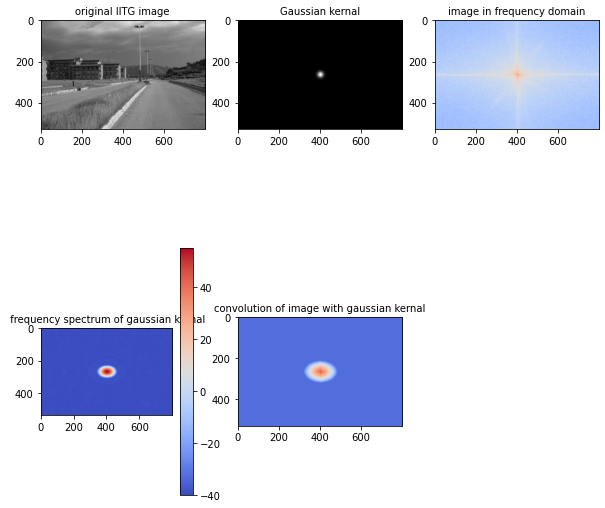

In [13]:
im = cv.imread('/content/IITG.jpg',0)

 
# Gaussian Kernel .
kernel = np.outer(signal.gaussian(im.shape[0], 10), signal.gaussian(im.shape[1], 10))

freq = fp.fft2(im)

assert(freq.shape == kernel.shape)
#Use DFT to obtain the Gaussian Kernel in the frequency domain.
freq_kernel = fp.fft2(fp.ifftshift(kernel))
# center the frequency response


convolved = freq*freq_kernel # by the Convolution theorem
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(im, cmap='gray')
plt.title("original IITG image",size=10)

plt.subplot(2,3,2)
plt.imshow(kernel, cmap='gray')
plt.title("Gaussian kernal",size=10)
plt.subplot(2,3,3)
plt.imshow((20*np.log10( 0.01 + fp.fftshift(freq))).real.astype(int), cmap='coolwarm')
plt.title("image in frequency domain",size=10)

plt.subplot(2,3,4)
plt.imshow( (20*np.log10( 0.01 + fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm')
plt.colorbar()
plt.title(" frequency spectrum of gaussian kernal",size=10)

plt.subplot(2,3,5)
plt.imshow((20*np.log10( 0.01 + fp.fftshift(convolved))).real.astype(int), cmap='coolwarm')
plt.title("convolution of image with gaussian kernal",size=10)






 


 Using the inverse filter to restore a motion-blurred image

>*First create a motion blur kernel of a given shape.Indented block.

>*Convolve the kernel with an input image in the frequency domain.

>*Get the motion-blurred image in the spatial domain with IDFT.

>*Compute the inverse filter kernel and convolve with the blurred image in the frequency domain.

>*Get the convolved image back in the spatial domain.

*Plot all the images and kernels in the frequency domain.















Text(0.5, 1.0, 'Diff restored from original image')

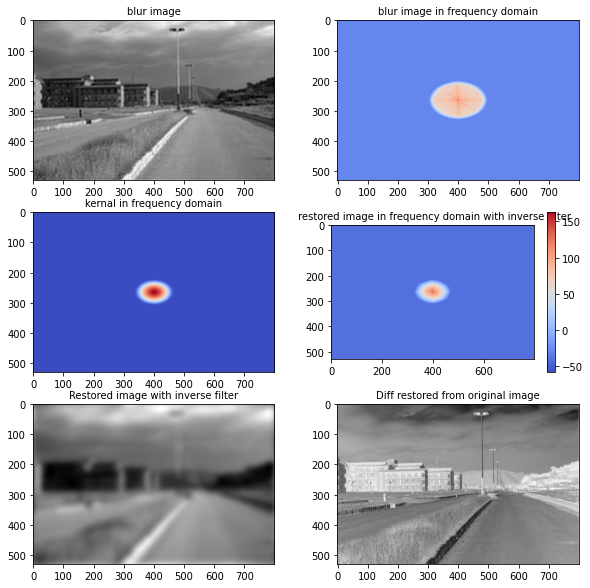

In [17]:
im_blur = fp.ifft2(convolved).real  #Use IDFT to obtain the output image.

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(im_blur)
plt.title("blur image",size=10)


im_blur = 255 * im_blur / np.max(im_blur)
im_blur = im_blur / np.max(im_blur)
 
epsilon = 10**-6
 
freq = fp.fft2(im_blur)
plt.subplot(3,2,2)
plt.imshow((20*np.log10( 0.01 + fp.fftshift(freq))).real.astype(int), cmap='coolwarm')
plt.title("blur image in frequency domain",size=10)
freq_kernel = 1 / (epsilon + freq_kernel)
plt.subplot(3,2,3)
plt.imshow((20*np.log10( 0.01 + fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm')
plt.title("kernal in frequency domain",size=10)

 
convolved = freq*freq_kernel
# center the frequency response
plt.subplot(3,2,4)
plt.imshow( (20*np.log10( 0.01 + fp.fftshift(convolved))).real.astype(int), cmap='coolwarm')
plt.colorbar()
plt.title(" restored image in frequency domain with inverse filter",size=10)

im_restored = fp.ifft2(convolved).real
im_restored = im_restored / np.max(im_restored)
 
plt.subplot(3,2,5)
plt.imshow(im_restored)
plt.title('Restored image with inverse filter', size=10)

plt.subplot(3,2,6)
plt.imshow(im_restored - im)
plt.title('Diff restored from original image', size=10)


# **Impact of noise on the inverse filter**



>Add some random noise to the original image.

> Blur the image with a Gaussian kernel.

> 
Restore the image using inverse filter.








(-0.5, 799.5, 529.5, -0.5)

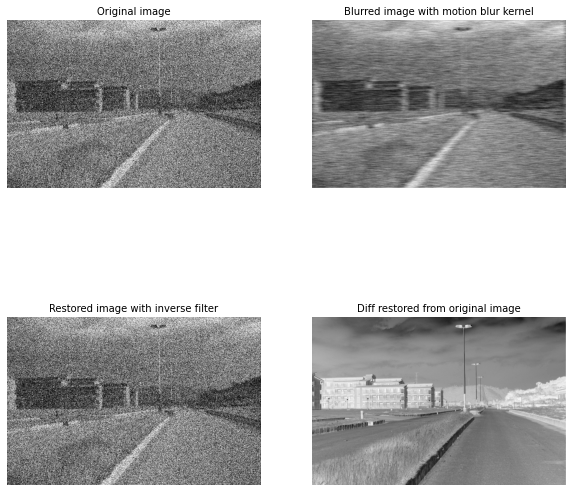

In [19]:
im_noise = random_noise(im, var=0.1)
size = 21
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :] = np.ones(size)
kernel = kernel / size
kernel = np.pad(kernel, (((im_noise.shape[0]-size)//2,(im_noise.shape[0]-size)//2+1), ((im_noise.shape[1]-size)//2,(im_noise.shape[1]-size)//2+1)), padwithzeros)
 
freq = fp.fft2(im_noise)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved1 = freq*freq_kernel
im_blur = fp.ifft2(convolved1).real
im_blur = im_blur / np.max(im_blur)
 
epsilon = 10**-6
 
freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel)
 
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = im_restored / np.max(im_restored)
 
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(im_noise)
plt.title('Original image', size=10)
plt.axis('off')
plt.subplot(222)
plt.imshow(im_blur)
plt.title('Blurred image with motion blur kernel', size=10)
plt.axis('off')
plt.subplot(223)
plt.imshow(im_restored)
plt.title('Restored image with inverse filter', size=10)
plt.axis('off')
plt.subplot(224)
plt.imshow(im_restored - im)
plt.title('Diff restored from original image', size=10)
plt.axis('off')


**Use a notch filter to remove periodic noise from the image.**


Use DFT to obtain the frequency spectrum of the image.
Block the high frequency components that are most likely responsible fro noise.
Use IDFT to come back to the spatial domain.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


(-0.5, 799.5, 529.5, -0.5)

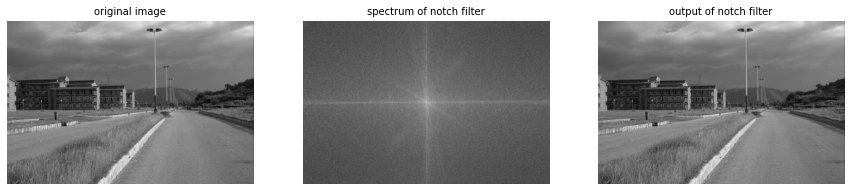

In [23]:
im =cv.imread('/content/IITG.jpg',0)
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift(F1)
w=1
h=2
for i in range(60, w, 135):
  for j in range(100, h, 200):
    if not (i == 330 and j == 500):
      F2[i-10:i+10, j-10:j+10] = 0
for i in range(0, w, 135):
  for j in range(200, h, 200):
    if not (i == 330 and j == 500):
      F2[max(0,i-15):min(w,i+15), max(0,j-15):min(h,j+15)] = 0
plt.figure(figsize=(15,15))
plt.subplot(1,3,2)
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.title("spectrum of notch filter",size=10)
plt.axis('off')
im1 = fp.ifft2(fftpack.ifftshift(F2)).real
plt.subplot(1,3,1)
plt.imshow(im1)
plt.title("original image",size=10)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(im1)
plt.title("output of notch filter",size=10)
plt.axis('off')
